<a href="https://colab.research.google.com/github/Veldora220/minor/blob/main/Stock_Market_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os


In [27]:
if os.path.exists("data.csv"):
    data = pd.read_csv("data.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [28]:
data

,Close,Open,High,Low,Vol.,Change
Date,,,,,,
03-01-2005,2115.00,2080.00,2118.60,2080.00,70.51,1.66
04-01-2005,2103.75,2116.95,2120.15,2100.55,72.72,-0.53
05-01-2005,2032.20,2103.75,2105.10,1990.15,109.22,-3.40
06-01-2005,1998.35,2031.55,2035.65,1984.25,94.32,-1.67
07-01-2005,2015.50,1998.25,2021.45,1992.55,76.29,0.86
...,...,...,...,...,...,...
27-11-2024,24274.90,24204.80,24354.55,24145.65,295.01,0.33
28-11-2024,23914.15,24274.15,24345.75,23873.35,366.75,-1.49
29-11-2024,24131.10,23927.15,24188.45,23927.15,282.10,0.91


In [29]:
ma_100_days = data.Close.rolling(100).mean()

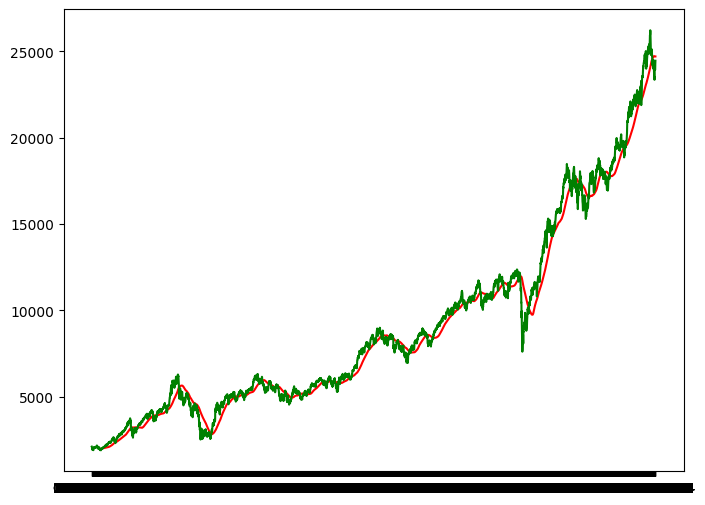

In [30]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [31]:
ma_200_days = data.Close.rolling(200).mean()

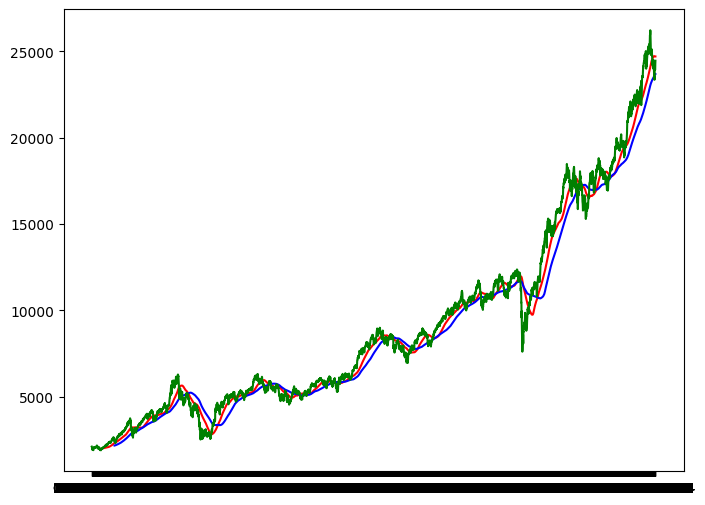

In [32]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [33]:
data_train.shape[0]

3933

In [34]:
data_test.shape[0]

984

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_train_scale = scaler.fit_transform(data_train)

In [37]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [38]:
x, y = np.array(x), np.array(y)

In [39]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [40]:
model= Sequential()
model.add(LSTM(units=50, activation ='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - loss: 0.0613
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: 0.0096
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 0.0083
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - loss: 0.0066
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: 0.0064
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - loss: 0.0056
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0054
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 288ms/step - loss: 0.0052
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0045
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - loss: 0.0040
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - loss: 0.0037
Epoch 12/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 289ms/step - loss: 0.0038
Epoch 13/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 304ms/step - loss: 0.0035
Epoch 14/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - loss: 0.0034
Epoch 15/50
120

In [43]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
pas_100_days = data_train.tail(100)

In [45]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [46]:
data_test_scale  =  scaler.fit_transform(data_test)

In [47]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [48]:
y_predict = model.predict(x)

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step


In [49]:
scale =1/scaler.scale_

In [50]:
y_predict = y_predict*scale

In [51]:
y = y*scale

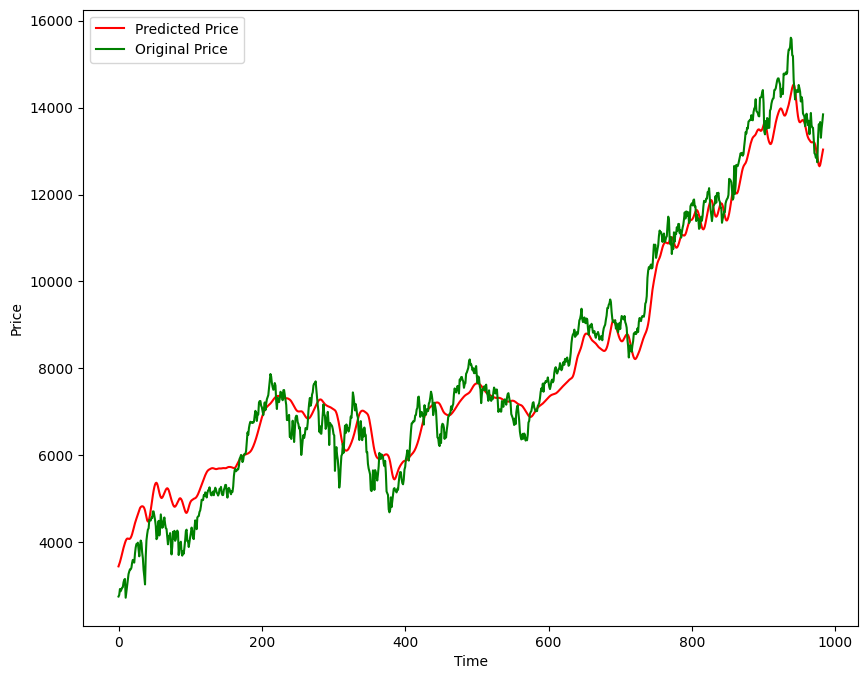

In [52]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
model.save('Stock Predictions Model.keras')